In [9]:
import pandas as pd

df_notes = pd.read_csv(r'C:\Users\nelso\Documents\Master Thesis\method_i\datasets_for_analysis\notes_dataset_verified.csv')

df_notes_status_history = pd.read_csv(r'C:\Users\nelso\Documents\Master Thesis\method_i\note_status_history_dataset_cleaned_v3.csv')

df_notes.info()
df_notes_status_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805975 entries, 0 to 805974
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   noteId                                  805975 non-null  int64  
 1   createdAtMillis                         805975 non-null  int64  
 2   classification                          805975 non-null  object 
 3   misleadingOther                         805975 non-null  int64  
 4   misleadingFactualError                  805975 non-null  int64  
 5   misleadingManipulatedMedia              805975 non-null  int64  
 6   misleadingOutdatedInformation           805975 non-null  int64  
 7   misleadingMissingImportantContext       805975 non-null  int64  
 8   misleadingUnverifiedClaimAsFact         805975 non-null  int64  
 9   misleadingSatire                        805975 non-null  int64  
 10  notMisleadingOther                      8059

In [10]:
df_notes_status_history = df_notes_status_history.merge(
    df_notes[['noteId', 'noteFromEFCSN', 'noteFromEDMO', 'noteFromOtherSource']], 
    on='noteId', 
    how='left'
)

df_notes_status_history.info()
df_notes_status_history.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992918 entries, 0 to 992917
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   noteId               992918 non-null  int64  
 1   createdAtMillis      992918 non-null  int64  
 2   currentStatus        992918 non-null  object 
 3   noteFromEFCSN        805975 non-null  float64
 4   noteFromEDMO         805975 non-null  float64
 5   noteFromOtherSource  805975 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 45.5+ MB


,noteId,createdAtMillis,currentStatus,noteFromEFCSN,noteFromEDMO,noteFromOtherSource
0,1741610610591154633,1704067301785,CURRENTLY_RATED_HELPFUL,0.0,0.0,1.0
1,1741610652911763734,1704067311875,CURRENTLY_RATED_HELPFUL,0.0,0.0,1.0
2,1741610736172867850,1704067331724,NEEDS_MORE_RATINGS,NaN,NaN,NaN
3,1741610816275955852,1704067350821,NEEDS_MORE_RATINGS,0.0,0.0,1.0
4,1741610995322077504,1704067393512,NEEDS_MORE_RATINGS,0.0,0.0,1.0


In [11]:
df_notes_status_history = df_notes_status_history.dropna(subset=['noteFromEFCSN', 'noteFromEDMO', 'noteFromOtherSource'])
df_notes_status_history.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805975 entries, 0 to 992917
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   noteId               805975 non-null  int64  
 1   createdAtMillis      805975 non-null  int64  
 2   currentStatus        805975 non-null  object 
 3   noteFromEFCSN        805975 non-null  float64
 4   noteFromEDMO         805975 non-null  float64
 5   noteFromOtherSource  805975 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 43.0+ MB


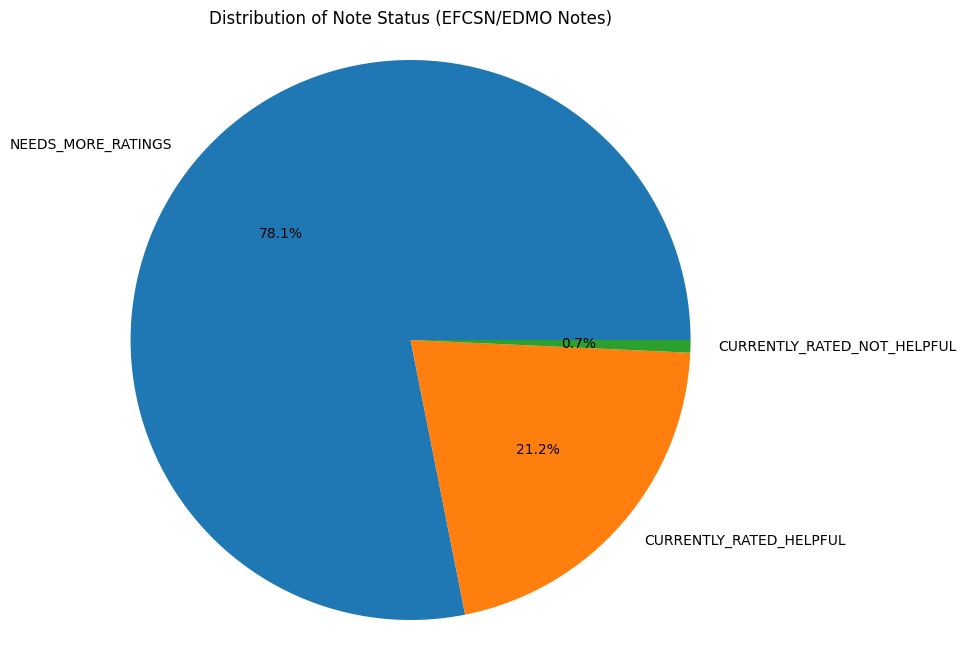

In [12]:
import matplotlib.pyplot as plt
# Filter ratings for EFCSN or EDMO notes
df_efcsn_edmo = df_notes_status_history[
    (df_notes_status_history['noteFromEFCSN'] == 1) | 
    (df_notes_status_history['noteFromEDMO'] == 1)
]
# Calculate the percentage distribution
status_distribution = df_efcsn_edmo['currentStatus'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(status_distribution, labels=status_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Note Status (EFCSN/EDMO Notes)')
plt.axis('equal')
plt.show()


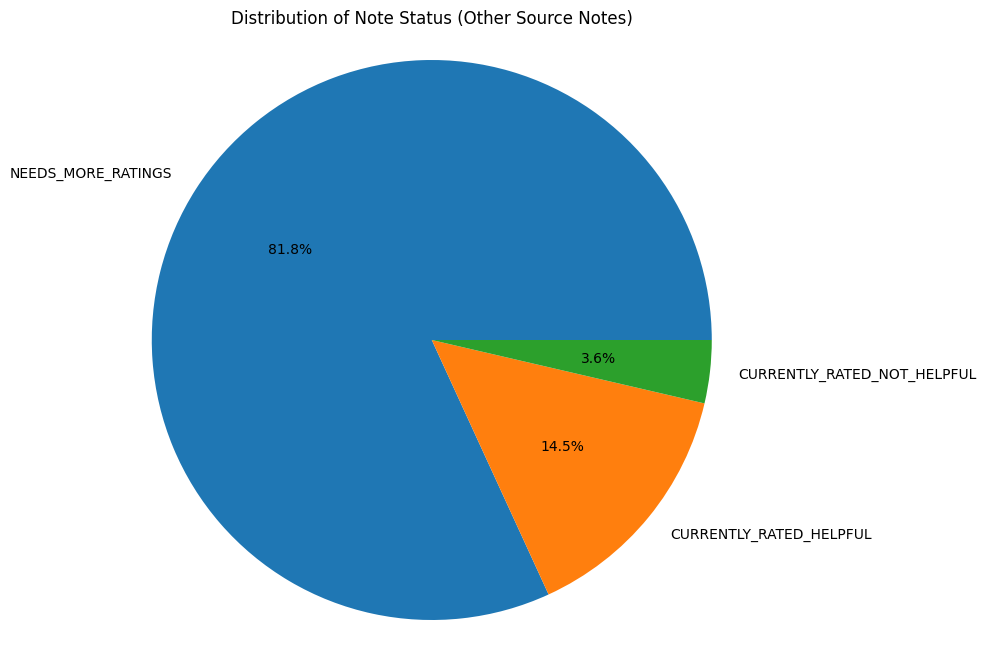

In [15]:
import matplotlib.pyplot as plt
# Filter ratings for EFCSN or EDMO notes
df_efcsn_edmo = df_notes_status_history[
    (df_notes_status_history['noteFromOtherSource'] == 1) 
]
# Calculate the percentage distribution
status_distribution = df_efcsn_edmo['currentStatus'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(status_distribution, labels=status_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Note Status (Other Source Notes)')
plt.axis('equal')
plt.show()